In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [5]:
df=pd.read_csv('/content/cities_by_day.csv',parse_dates=['Date'])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


#calculating proportion of null values

In [8]:
missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Reds')

,Proportion
C8H10,0.613220
PM10,0.377231
NH3,0.349734
C7H8,0.272290
C6H6,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


In [9]:
rcParams['figure.dpi']=300

rcParams['figure.autolayout']=True

rcParams['font.style']='normal'
rcParams['font.size']=4

rcParams['lines.linewidth']=0.7


rcParams['xtick.labelsize']=4
rcParams['ytick.labelsize']=4

#Grouping the AQI by city and calculating the average AQI per city

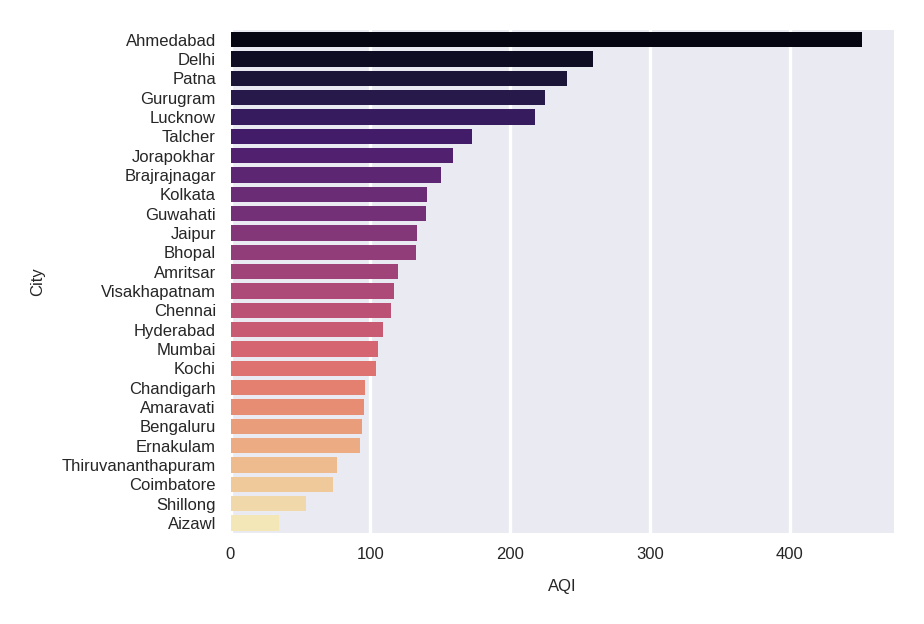

In [18]:
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(3,2))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='magma')

In [21]:
list(df.columns.values)

['City',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'C6H6',
 'C7H8',
 'C8H10',
 'AQI',
 'AQI_Bucket',
 'Month',
 'Year']

In [19]:
df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

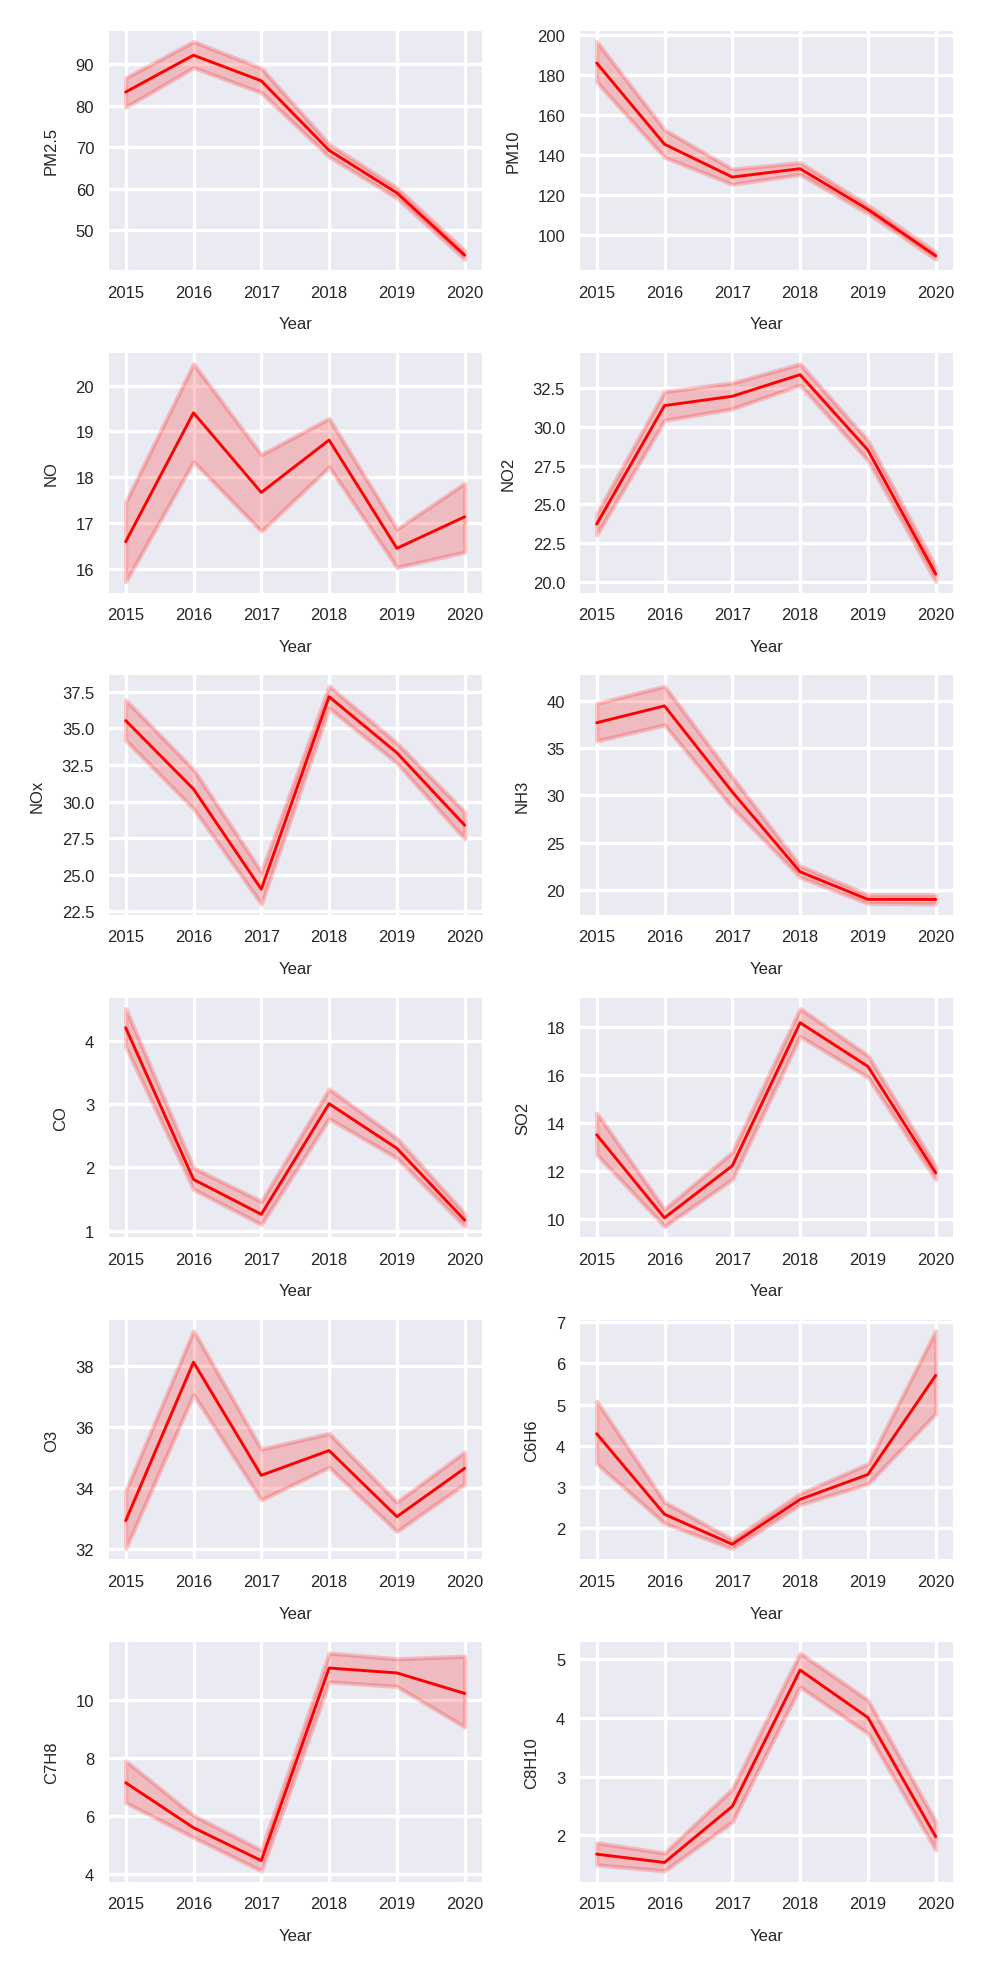

In [50]:
#distribution of pollutants over the years 
cols=['PM2.5','PM10','NO','NO2','NOx','NH3',
      'CO','SO2','O3','C6H6','C7H8','C8H10']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(3.2,6.5))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x,color='red')

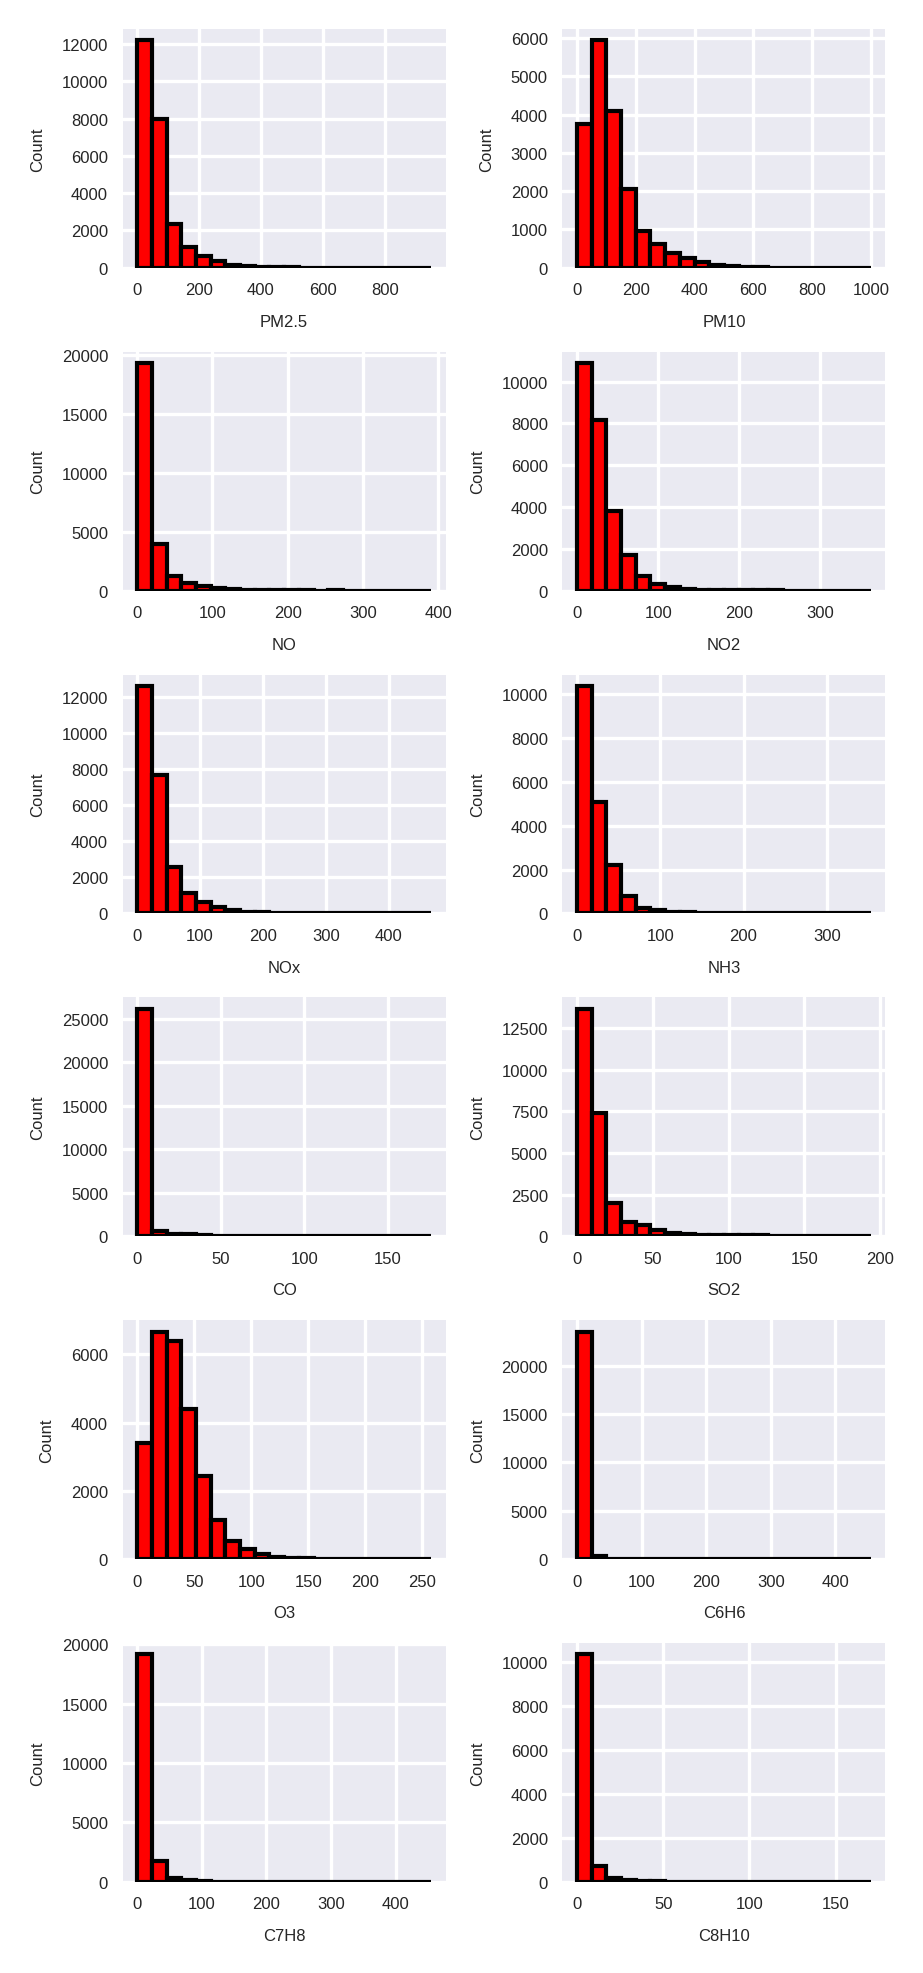

In [53]:
#distribution of various pollutants
cols=['PM2.5','PM10','NO','NO2','NOx','NH3',
      'CO','SO2','O3','C6H6','C7H8','C8H10']
fig=plt.figure(figsize=(3,6.5))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(df[col].dropna(),bins=20,edgecolor='black',color='red')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

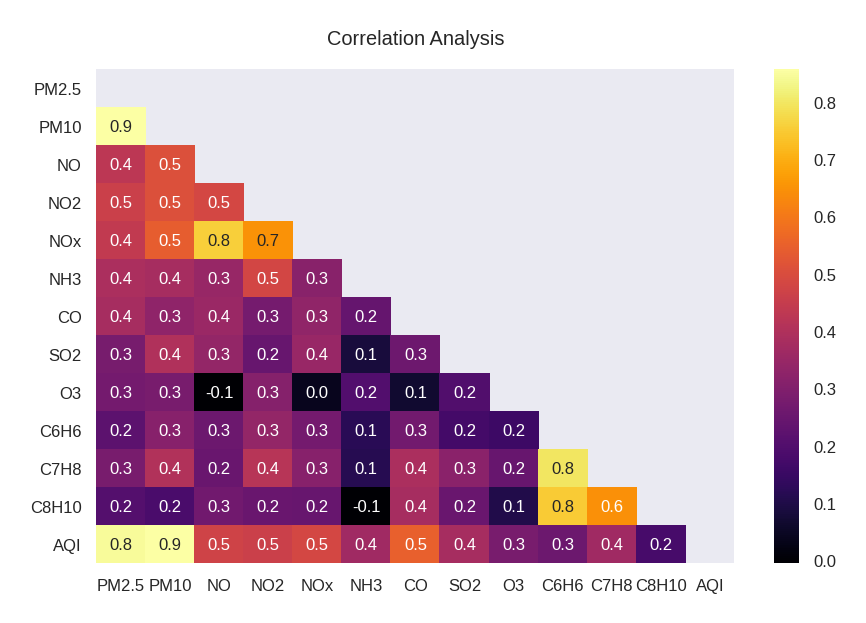

In [33]:
#Correlation analysis
plt.figure(figsize=(3,2))

mask=np.triu(df.corr(method='spearman'))
sns.heatmap(df.corr(method='spearman'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='inferno')
plt.title('Correlation Analysis')

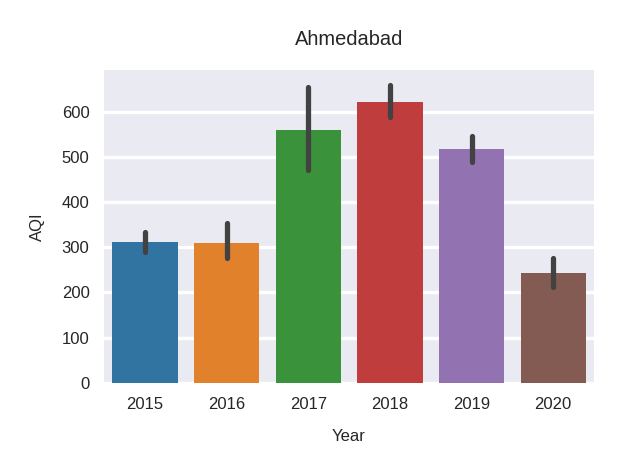

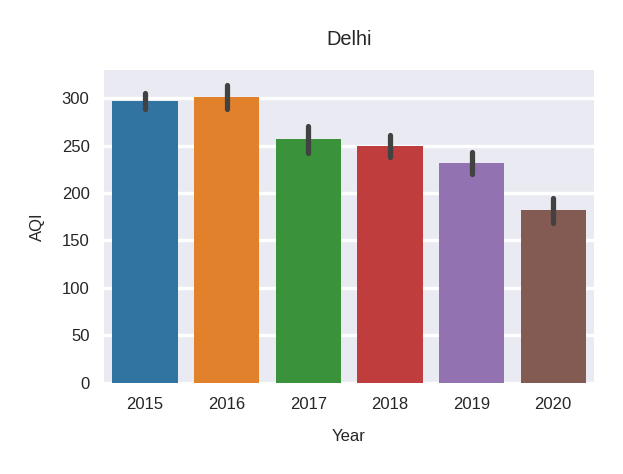

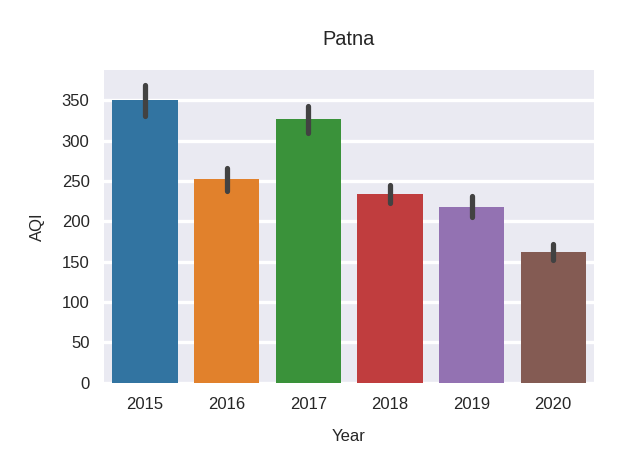

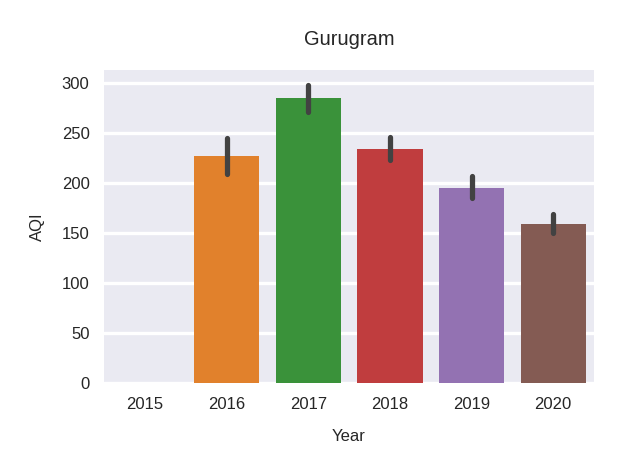

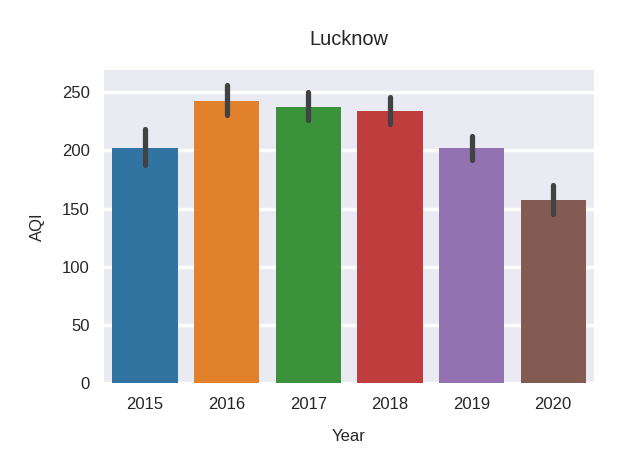

In [37]:
#average AQI for top 5 cities with avg AQI greater than 200
df['City'][df['AQI']>=200].value_counts()

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(2,1.5))
    x=df[df['City']==col]
    sns.barplot(x='Year',y='AQI',data=x)
    plt.title(col)

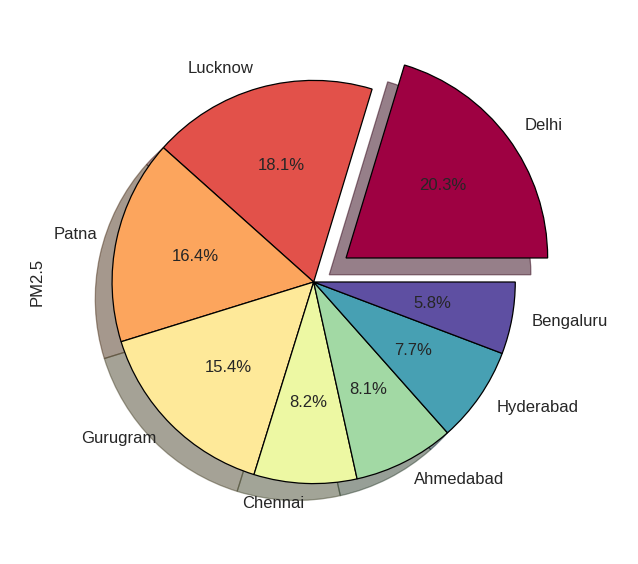

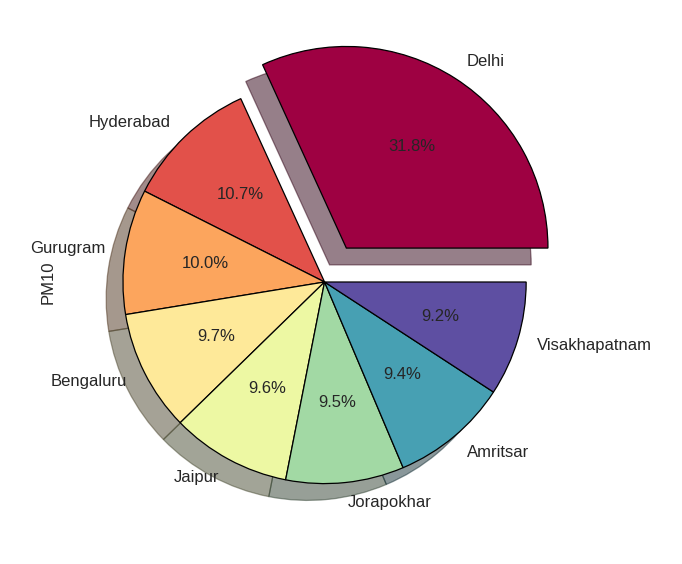

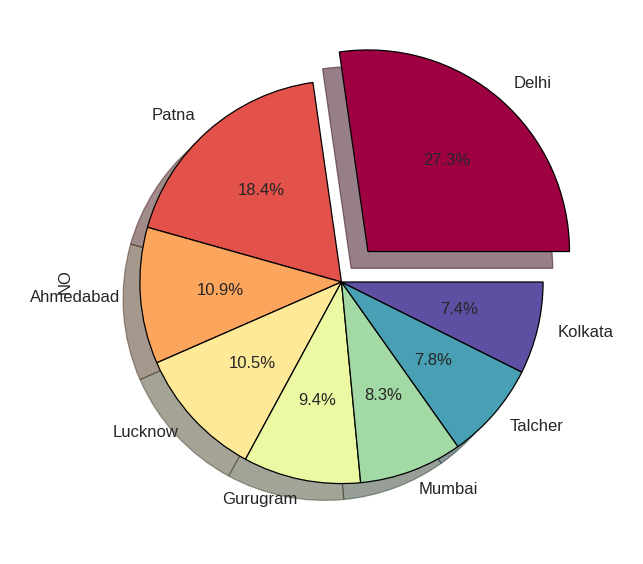

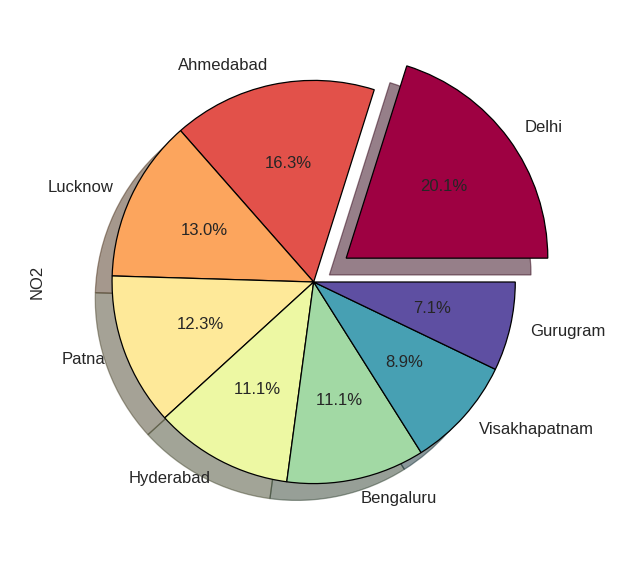

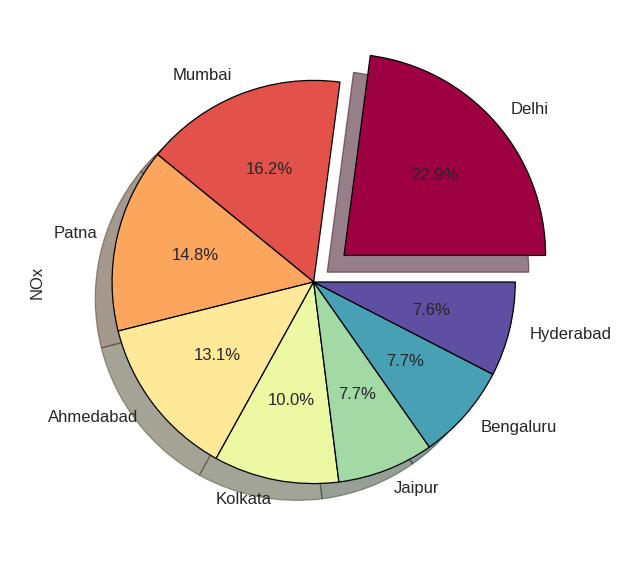

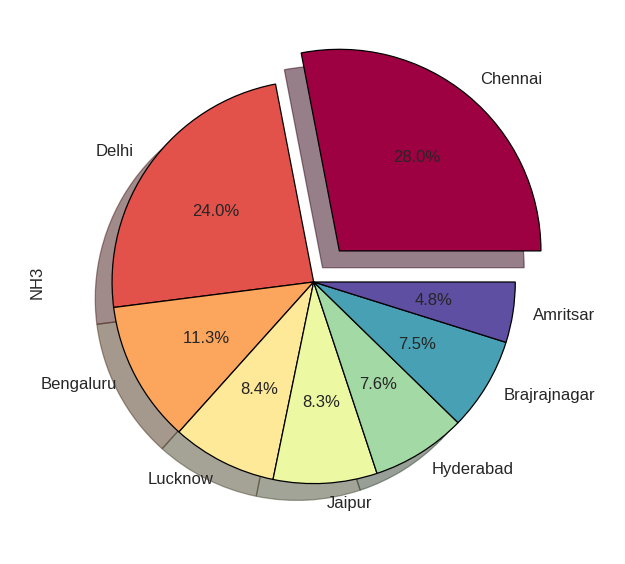

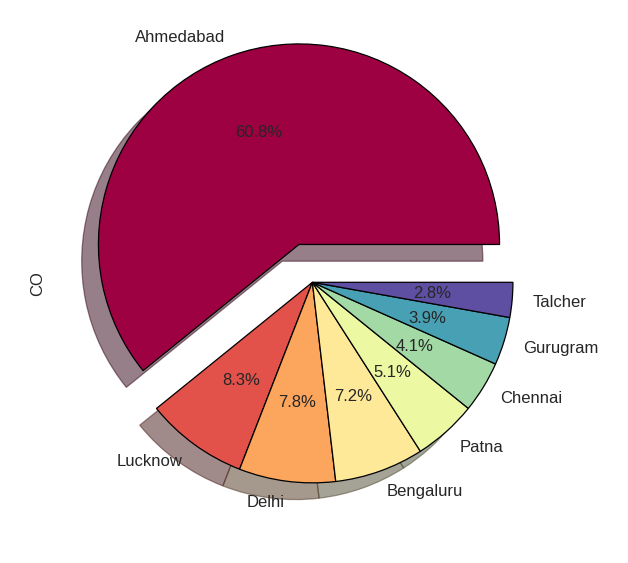

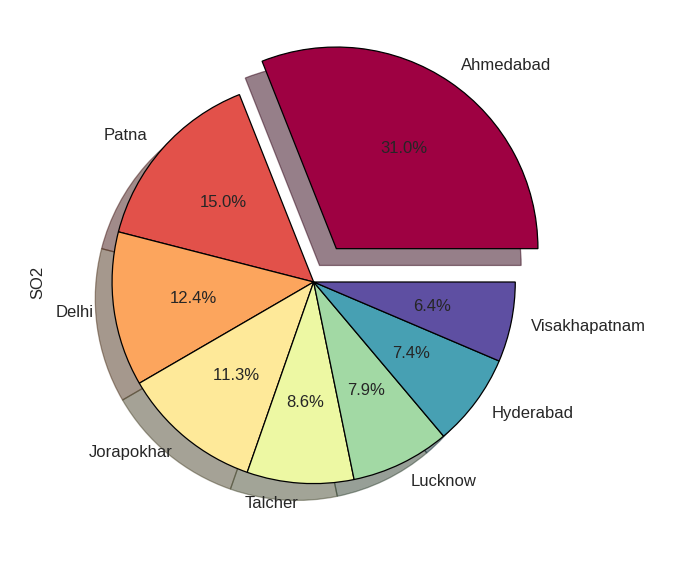

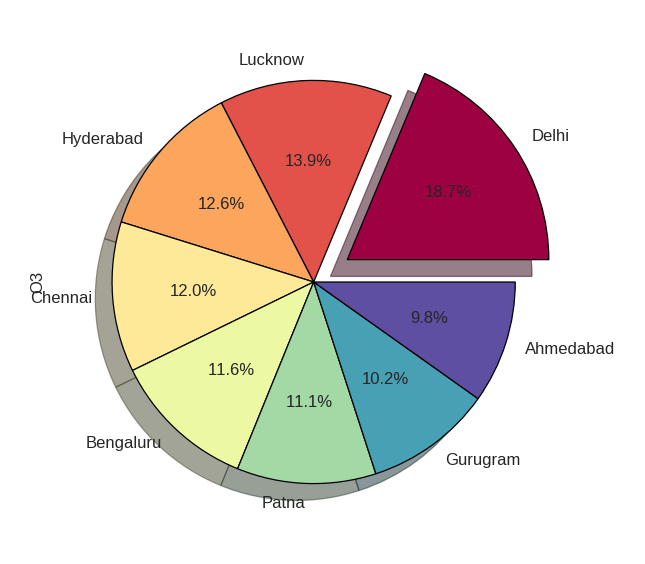

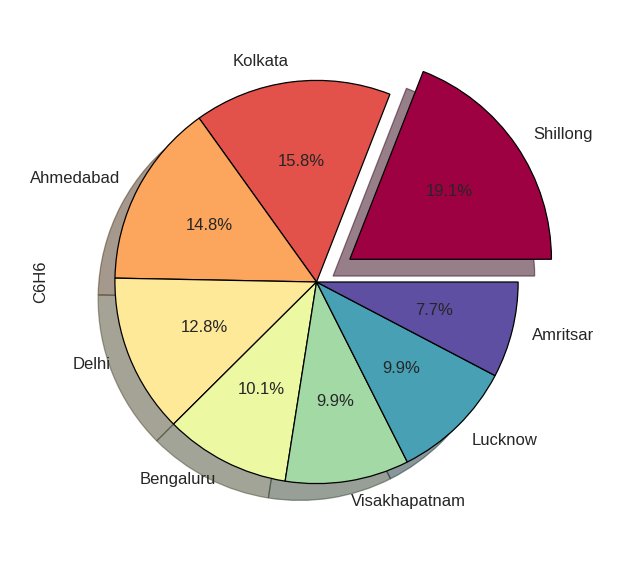

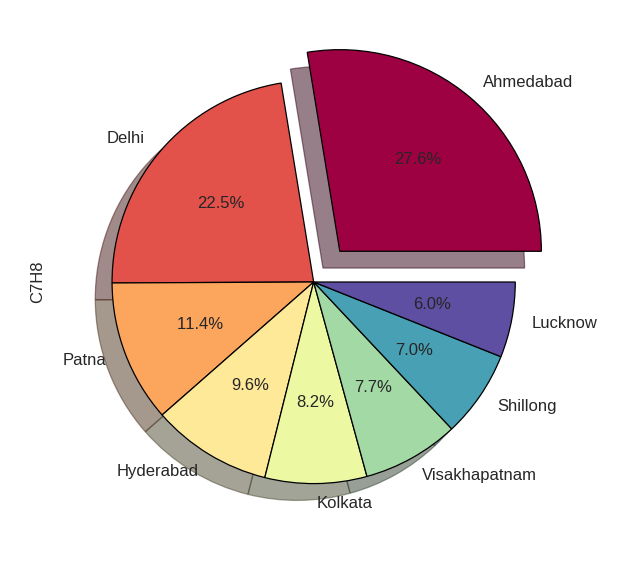

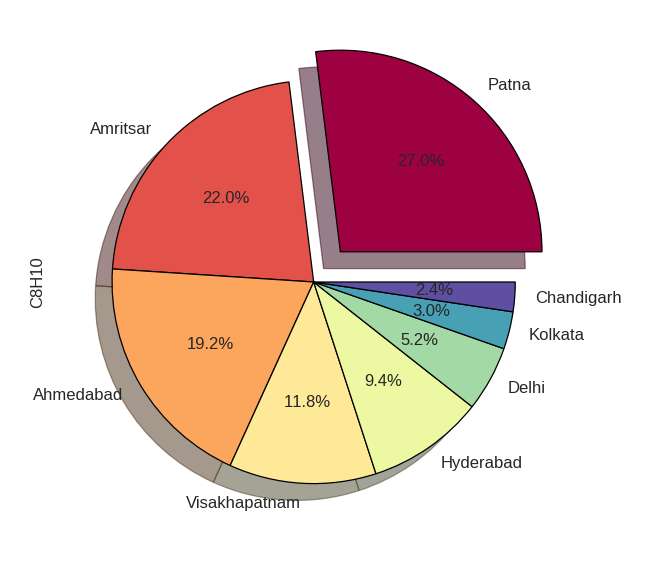

In [43]:
#piecharts showing the distribution of pollutants for the cities with larger AQI values
cols=['PM2.5','PM10','NO','NO2','NOx','NH3',
      'CO','SO2','O3','C6H6','C7H8','C8H10']

cmap=plt.get_cmap('Spectral')
color=[cmap(i) for i in np.linspace(0,1,8)]
explode=[0.2,0,0,0,0,0,0,0]

for col in cols:
    plt.figure(figsize=(2.8,1.8))   
    x=df.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                   colors=color,explode=explode,
                   wedgeprops={'edgecolor':'black','linewidth':0.3}
                   )

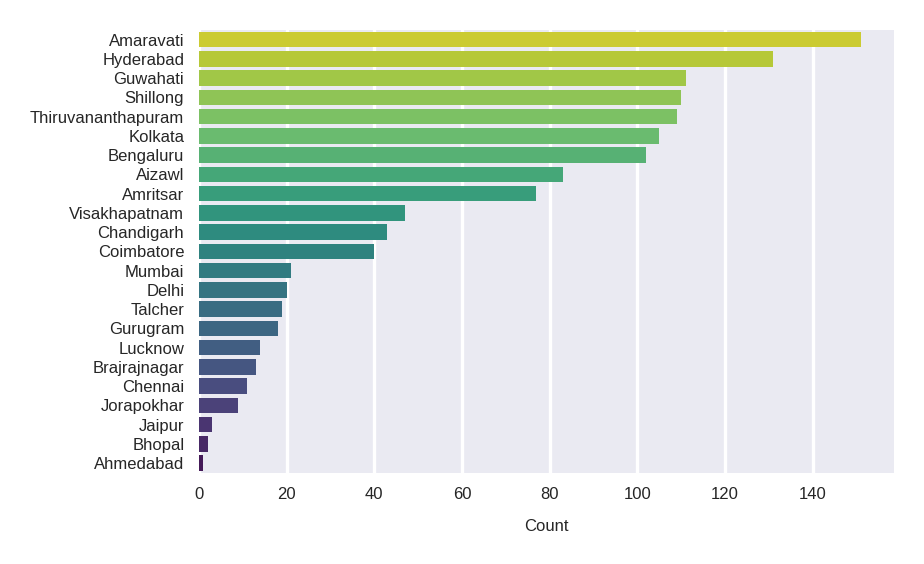

In [44]:
#distribution according to least AQI concentration
x=pd.DataFrame(df['City'][df['AQI']< 50].value_counts())
x=x.rename(columns={'City':'Count'})

plt.figure(figsize=(3,1.8))
sns.barplot(x='Count',y=x.index,data=x,palette='viridis_r')

Text(0.5, 1.0, 'AQI distribuiton of Hyderabad over Years')

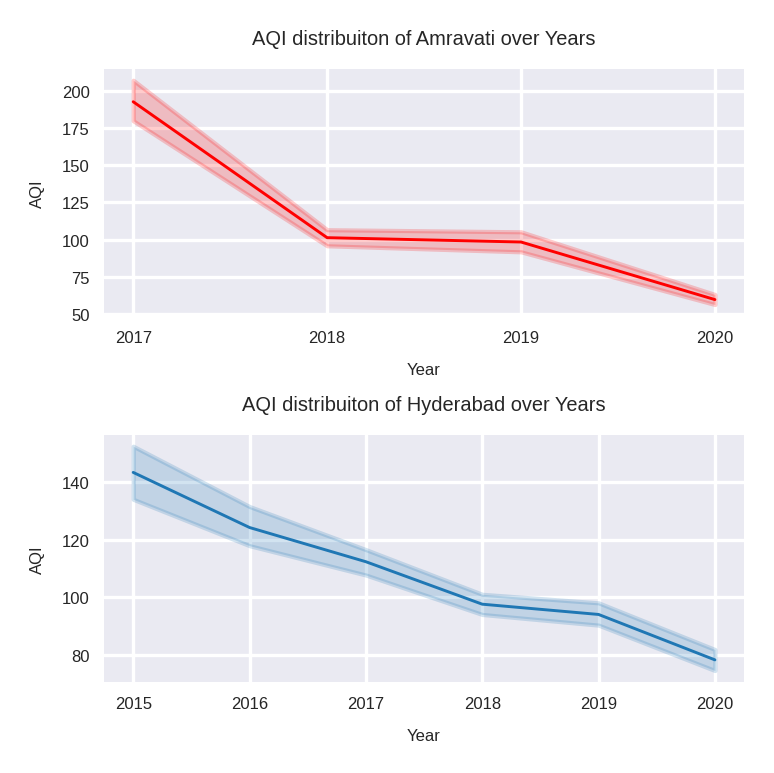

In [49]:
#as is evident form above Hyderabad and Amaravati are the two cities with least AQI
x=df[df['City']=='Amaravati']
x1=df[df['City']=='Hyderabad']


plt.style.use('seaborn-darkgrid')
fig,ax=plt.subplots(2,1)
fig.set_size_inches(2.5,2.5)
ax[0]=sns.lineplot(x='Year',y='AQI',data=x,ax=ax[0],color='red')
ax[1]=sns.lineplot(x='Year',y='AQI',data=x1,ax=ax[1])
ax[0].set_title('AQI distribuiton of Amravati over Years')
ax[1].set_title('AQI distribuiton of Hyderabad over Years')